# CS635 - Homework 3 Submission

**Student Name -** Vivek Lad

**Email -** vl9244@rit.edu 

**GitHub Submission link** - https://github.com/RIT-Teaching/homework3-vivekladprism

*Disclaimer: Consider this a guide to follow. You are not required to use these functions, you are free to use your own. The overall structure should be retained and the header modified.*

In [1]:
!pip install sentence_transformers

     |████████████████████████████████| 71kB 2.0MB/s 
     |████████████████████████████████| 778kB 7.1MB/s 
     |████████████████████████████████| 1.1MB 16.9MB/s 
     |████████████████████████████████| 3.0MB 21.3MB/s 
     |████████████████████████████████| 890kB 40.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.2-cp36-none-any.whl size=93964 sha256=d18036a721cc461da86395dc2deefbe17b7aa14467c1f4f03847961e0ea0c596
  Stored in directory: /root/.cache/pip/wheels/f7/06/a0/567f3651876165429f6510d3197b011652a25e547552816824
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=4e3878baa35d8f6debc039ec6e30a23baf74fdbf0fce262009c8397e5a38a9a3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [16]:
# Pre Processing
import datetime
import math
import pandas as pd
import warnings
from collections import defaultdict,OrderedDict
import os, json, re, string
import numpy as np
from sentence_transformers import SentenceTransformer

#Change this function for the file paths if its different.
def load_default_parameters():
    train_file = "data/facebook/processed/fb_train.json"
    dev_file = "data/facebook/processed/fb_dev.json"
    test_file = "data/facebook/processed/fb_test.json"
    output_file = "facebook_kmeans"
    folder_name = "data/facebook/processed/fb/kmeans_predict"
    return train_file,dev_file,test_file,output_file,folder_name

def get_feature_vectors_only(fdict, data):
    #output = {}
    output = defaultdict(list)
    for item in data:
        vect = vectorize(fdict, item["labels"])
        total_labels = float(sum(vect))
        vect[:] = [x /total_labels for x in vect]
        item["message_id"] = item["message_id"]
        output[item["message_id"]] = vect
    return output

def compile_tweet_dict(json_list):
    result = {int(x["message_id"]): x["message"] for x in json_list}
    return result

def create_folder(foldername):
    if not os.path.exists(foldername):
        os.makedirs(foldername)

def read_json(fname):
    datastore = defaultdict(list)
    if fname:
        with open(fname, 'r') as f:
            datastore = json.load(f)
    return datastore

def get_data_dict (l):
    enuml = enumerate(l)
    fdict = defaultdict(list)
    rdict = defaultdict(list)
    fdict = {k:v for v, k in enuml}
    rdict = {k:v for v, k in fdict.items()}
    return (fdict, rdict)

def vectorize(fdict, labels):
    vect = defaultdict(list)
    vect = [0] * len(fdict)
    for name,number in labels.items():
        vect[fdict[name]] = number
    return vect
    
def write_model_logs_to_json(MODEL_LOG_DIR, results_dict, output_name):
    with open(MODEL_LOG_DIR +"/"+ output_name + ".json", "w") as fp:
        json.dump(results_dict, fp, sort_keys=True, indent=4)
    print ("Saved to "+MODEL_LOG_DIR +"/"+ output_name + ".json")

def read_labeled_data_KMeans(filename):
    answer_counters = defaultdict(list)
    JSONfile = read_json(filename)
    message_dict = compile_tweet_dict(JSONfile["data"])
    (fdict, label_dict) = get_data_dict(JSONfile["dictionary"])
    answer_counters = get_feature_vectors_only(fdict, JSONfile["data"])
    return answer_counters,message_dict,label_dict

def preprocess_data(input_train_file_name,input_dev_file_name,input_test_file_name,folder_name):

    create_folder(folder_name)
    create_folder(folder_name + "/logs")
    create_folder(folder_name + "/logs/models")

    train_answer_counters,train_message_dict,label_dict = read_labeled_data_KMeans(input_train_file_name)

    dev_answer_counters,dev_message_dict,label_dict = read_labeled_data_KMeans(input_dev_file_name)

    test_answer_counters,test_message_dict,label_dict = read_labeled_data_KMeans(input_test_file_name)

    return train_answer_counters,dev_answer_counters,label_dict,train_message_dict,dev_message_dict,test_answer_counters,test_message_dict

## Pre-Processing Data and Loading them up for your pipeline

In [17]:
train_file,dev_file,test_file,output_file,folder_name = load_default_parameters()
#Reading Data
train_answer_counters,dev_answer_counters,label_dict,train_message_dict,dev_message_dict,test_answer_counters,test_message_dict = preprocess_data(train_file,dev_file,test_file,folder_name)
print(train_answer_counters)

defaultdict(<class 'list'>, {'10154485216228132': [0.9727272727272728, 0.01818181818181818, 0.004545454545454545, 0.004545454545454545, 0.0], '10154067726059497': [0.12149532710280374, 0.06542056074766354, 0.7383177570093458, 0.037383177570093455, 0.037383177570093455], '10154275009048132': [0.2894736842105263, 0.5701754385964912, 0.14035087719298245, 0.0, 0.0], '1367784216573750': [0.553932584269663, 0.12471910112359551, 0.2876404494382023, 0.025842696629213482, 0.007865168539325843], '10153574967355667': [0.26229508196721313, 0.03278688524590164, 0.6639344262295082, 0.0, 0.040983606557377046], '10153893145221006': [0.030598052851182198, 0.015299026425591099, 0.8831710709318498, 0.008344923504867872, 0.06258692628650904], '10153489859662217': [0.040697674418604654, 0.0755813953488372, 0.0, 0.875, 0.00872093023255814], '10154780853989552': [0.18309859154929578, 0.07042253521126761, 0.704225352112676, 0.028169014084507043, 0.014084507042253521], '10153544421707746': [0.7849604221635884,

**# Q2**

In [18]:
import regex as re
from sklearn.cluster import KMeans
embedder = SentenceTransformer('bert-base-nli-mean-tokens')

for i in train_message_dict.keys():

  train_message_dict[i]= re.sub(r"[^A-Za-z0-9]+", " ",train_message_dict[i])
#print(corpusList)

corpus_embeddings = embedder.encode(train_message_dict.values())

num_of_clusters = 5
clustering_model = KMeans(n_clusters=num_of_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

cluster_dict = {}
index = 0
for i in train_message_dict.keys():
  cluster_dict[i] = cluster_assignment[index]
  index = index + 1
print("The cluster distribution of the data space is = ")
print(cluster_assignment)
#print(cluster_dict)


The cluster distribution of the data space is = 
[1 2 4 3 1 3 1 0 1 3 2 0 4 3 2 3 2 1 0 1 1 3 3 0 0 3 3 0 0 2 2 0 3 3 4 3 3
 1 0 0 3 2 3 3 0 1 2 0 4 3 2 4 0 4 1 3 0 2 3 0 2 0 1 4 0 2 3 1 0 3 0 3 4 3
 0 2 1 3 0 3 0 2 2 1 1 3 4 3 4 3 4 3 4 3 0 0 1 0 2 1 0 3 1 0 1 3 3 4 3 3 3
 1 4 2 3 4 1 2 0 2 2 3 3 3 3 3 2 1 1 0 1 0 3 3 1 4 1 2 3 2 3 2 1 3 0 4 2 4
 3 0 1 3 2 3 1 1 0 4 0 1 1 3 1 4 3 4 0 3 3 0 3 4 3 3 3 3 1 0 0 3 1 3 2 1 3
 3 3 0 3 0 1 1 2 4 2 4 4 0 3 4 1 0 0 0 3 3 3 0 4 0 3 0 3 3 0 2 4 2 0 0 3 0
 1 2 0 0 3 2 3 1 0 3 1 3 4 3 0 3 1 0 2 3 4 2 2 2 0 0 0 4 0 3 1 3 4 0 2 0 2
 4 1 4 1 1 3 1 3 1 1 3 2 1 1 3 4 3 2 0 2 0 3 1 2 2 0 2 0 0 0 4 4 0 1 1 1 1
 4 1 4 2 1 3 3 2 0 3 0 1 1 3 3 2 2 1 0 3 0 4 2 3 2 3 2 3 3 4 0 0 0 2 0 3 1
 0 4 3 4 4 1 3 3 0 1 3 3 0 4 0 3 0 0 3 1 3 2 1 3 3 2 0 4 4 0 0 0 1 3 0 3 4
 3 1 3 0 3 4 3 1 1 4 1 3 2 3 3 2 4 0 4 0 3 1 2 0 2 2 2 0 0 3 3 3 2 3 3 3 1
 1 4 4 3 1 1 2 1 4 3 1 3 4 2 1 3 2 2 0 3 0 0 2 2 2 3 0 2 3 1 2 1 2 3 2 4 3
 1 3 2 3 0 1 1 3 2 0 0 0 3 3 4 2 1 4 0 3 1 3 1 4 3 

**# Q3**

In [20]:
list1 = []
for i in range(num_of_clusters):
  l = [0]*num_of_clusters
  list1.append(l)

cluster_size_counter = [0] * num_of_clusters
for key in cluster_dict.keys():
  cluster_num = cluster_dict[key]
  z = train_answer_counters[str(key)]
  for i in range(5): 
    list1[cluster_num][i] = list1[cluster_num][i] + z[i]
  cluster_size_counter[cluster_num] = cluster_size_counter[cluster_num] + 1
print("Number of items per cluster = ")
print(cluster_size_counter)

#print(list1)
for i in range(num_of_clusters):
  for j in range(5):
    list1[i][j] = list1[i][j] / cluster_size_counter[i]

print("PDF = ")
for i in range(num_of_clusters):
  print(list1[i])

Number of items per cluster = 
[209, 193, 146, 299, 152]
PDF = 
[0.2287825198300072, 0.17124861739506148, 0.15833602246223089, 0.25124381256292766, 0.19038902774977282]
[0.6302601430462572, 0.12807319494295039, 0.1415914850006423, 0.059282235480391604, 0.04079294152975844]
[0.45486689675324743, 0.1692993829977977, 0.279287229802749, 0.059360334811931204, 0.037186155634274444]
[0.49498061049740977, 0.17708356386660748, 0.1422480685088225, 0.07997300864836163, 0.10571474847879855]
[0.33214243427362805, 0.14223102587791295, 0.2655289652311941, 0.09359426194287461, 0.16650331267439034]


**# Q4**

Num of cluster =  4  Average KL loss =  0.3297501033503399
Num of cluster =  5  Average KL loss =  0.3291055185270969
Num of cluster =  6  Average KL loss =  0.3329805394359627
Num of cluster =  7  Average KL loss =  0.3168235186904753
Num of cluster =  8  Average KL loss =  0.3287492015925444
Num of cluster =  9  Average KL loss =  0.35508466621180507
Num of cluster =  10  Average KL loss =  0.33752496536330645
Num of cluster =  11  Average KL loss =  0.34801641091902
Num of cluster =  12  Average KL loss =  0.35063652798651584
Num of cluster =  13  Average KL loss =  0.36258925597919417
Num of cluster =  14  Average KL loss =  0.38045558122290263
Num of cluster =  15  Average KL loss =  0.35262635235102496
Num of cluster =  16  Average KL loss =  0.3530831965064551
Num of cluster =  17  Average KL loss =  0.37855156285648695
Num of cluster =  18  Average KL loss =  0.3940179064371898
Num of cluster =  19  Average KL loss =  0.37865139204247145
Num of cluster =  20  Average KL loss = 

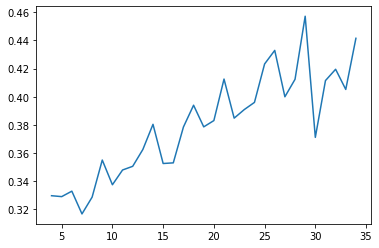

In [21]:
from math import log2
import seaborn as sns

def KLDivergence(p, q):
  sum = 0
  for i in range(len(p)):
    if(p[i]!=0 and q[i]!=0):
      sum = sum + p[i] * log2(p[i]/q[i])
  return sum

avgKLlossGlobal = 99999
cluster_size = 0
Klloss_array = []
for c in range(4,35,1):
  num_of_clusters = c
  clustering_model = KMeans(n_clusters=num_of_clusters)
  clustering_model.fit(corpus_embeddings)
  cluster_assignment = clustering_model.labels_

 # print("Number of clusters = " , num_of_clusters)
  cluster_dict = {}
  index = 0
  for i in train_message_dict.keys():
    cluster_dict[i] = cluster_assignment[index]
    index = index + 1
  #print(cluster_assignment)
  #print(cluster_dict)

  #print("Cluster Dict = ",cluster_dict)
  list1 = []
  for i in range(num_of_clusters):
    l = [0]*5
    list1.append(l)

  #print("List1 intially = " , list1)
  cluster_size_counter = [0] * num_of_clusters
  for key in cluster_dict.keys():
    cluster_num = cluster_dict[key]
    z = train_answer_counters[str(key)]
    for i in range(5): 
      list1[cluster_num][i] = list1[cluster_num][i] + z[i]
    cluster_size_counter[cluster_num] = cluster_size_counter[cluster_num] + 1
 # print("Number of items per cluster = ")
 # print(cluster_size_counter)

  #print(list1)
  for i in range(num_of_clusters):
    for j in range(5):
      list1[i][j] = list1[i][j] / cluster_size_counter[i]

  #print("PDF = ")
 # for i in range(num_of_clusters):
   # print(list1[i])

  q = [1/5] * 5
  avgKLloss = 0
  for i in range(num_of_clusters):
    avgKLloss = avgKLloss + KLDivergence(list1[i], q)
  avgKLloss = avgKLloss / num_of_clusters

  Klloss_array.append(avgKLloss)
  print("Num of cluster = ",c, " Average KL loss = " , avgKLloss)
  if avgKLloss < avgKLlossGlobal:
    avgKLlossGlobal = avgKLloss
    cluster_size = c
print()

sns.lineplot(np.arange(4,35), Klloss_array)
print()
print("The cluster size for which the loss is minimum is = ", cluster_size)
print("The minimum loss is = ", avgKLlossGlobal)


# **Q5**

Num of cluster =  4  Average KL loss =  0.7719809416673107
Num of cluster =  5  Average KL loss =  0.8187231882914097
Num of cluster =  6  Average KL loss =  0.8557736962883206
Num of cluster =  7  Average KL loss =  0.8664931139189449
Num of cluster =  8  Average KL loss =  0.8615752269604809
Num of cluster =  9  Average KL loss =  0.9074113016694579
Num of cluster =  10  Average KL loss =  0.8643274444130069
Num of cluster =  11  Average KL loss =  0.8689976443825338
Num of cluster =  12  Average KL loss =  0.9073937279336065
Num of cluster =  13  Average KL loss =  0.886402609101993
Num of cluster =  14  Average KL loss =  0.9027039363606064
Num of cluster =  15  Average KL loss =  0.889628366515904
Num of cluster =  16  Average KL loss =  0.9088673139541701
Num of cluster =  17  Average KL loss =  0.9020562093230318
Num of cluster =  18  Average KL loss =  0.9107107554501765
Num of cluster =  19  Average KL loss =  0.9342346189131023
Num of cluster =  20  Average KL loss =  0.91807

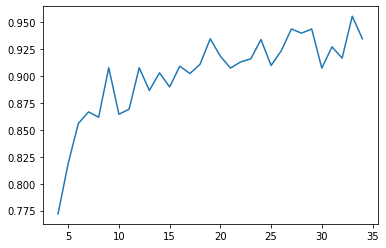

In [23]:
label_list = []

for key in train_answer_counters.keys():
  label_list.append(train_answer_counters[key])

avgKLlossGlobal = 99999
cluster_size = 0
Klloss_array = []
for c in range(4,35,1):
  num_of_clusters = c
  clustering_model = KMeans(n_clusters=num_of_clusters)
  clustering_model.fit(label_list)
  cluster_assignment = clustering_model.labels_

  #print(cluster_assignment)
 # print("Number of clusters = " , num_of_clusters)
  cluster_dict = {}
  index = 0
  for i in train_message_dict.keys():
    cluster_dict[i] = cluster_assignment[index]
    index = index + 1
  #print(cluster_assignment)
  #print(cluster_dict)

  #print("Cluster Dict = ",cluster_dict)
  list1 = []
  for i in range(num_of_clusters):
    l = [0]*5
    list1.append(l)

  #print("List1 intially = " , list1)
  cluster_size_counter = [0] * num_of_clusters
  for key in cluster_dict.keys():
    cluster_num = cluster_dict[key]
    z = train_answer_counters[str(key)]
    for i in range(5): 
      list1[cluster_num][i] = list1[cluster_num][i] + z[i]
    cluster_size_counter[cluster_num] = cluster_size_counter[cluster_num] + 1
 # print("Number of items per cluster = ")
 # print(cluster_size_counter)

  #print(list1)
  for i in range(num_of_clusters):
    for j in range(5):
      list1[i][j] = list1[i][j] / cluster_size_counter[i]

  #print("PDF = ")
 # for i in range(num_of_clusters):
   # print(list1[i])

  q = [1/5] * 5
  avgKLloss = 0
  for i in range(num_of_clusters):
    avgKLloss = avgKLloss + KLDivergence(list1[i], q)
  avgKLloss = avgKLloss / num_of_clusters

  Klloss_array.append(avgKLloss)
  print("Num of cluster = ",c, " Average KL loss = " , avgKLloss)
  if avgKLloss < avgKLlossGlobal:
    avgKLlossGlobal = avgKLloss
    cluster_size = c
print()

sns.lineplot(np.arange(4,35), Klloss_array)

print()
print("The cluster size for which the loss is minimum is = ", cluster_size)
print("The minimum loss is = ", avgKLlossGlobal)

